# Distribuciones en forma de anillo

In [21]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min,r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

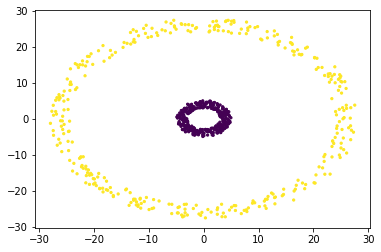

In [23]:
data1 = ring(3, 5)
data2 = ring(24, 28)

data = np.concatenate([data1,data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))],[1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5)

## Algoritmo con K-Means

In [24]:
from sklearn.cluster import KMeans

In [25]:
# A ojo hay 2 clusters
km = KMeans(2).fit(data)

In [26]:
clusters = km.predict(data)

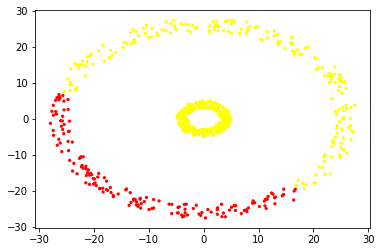

In [27]:
plt.scatter(data[:,0],data[:,1], c = clusters, s = 5, cmap = 'autumn_r')

Vemos que k-means no es capaz de clasificar datos distribuidos de forma circular.

Esta técnica tiene el problema de que se basa en usar métricas que son distancias (euclídea, manhattan, etc.).

Esto produce objetos (grupos) "convexos". Es decir, que podemos unir dos puntos cualquiera dentro de estos objetos mediante una línea recta.

Cuando esto no nos sea útil por el tipo de distribución de los datos, tendremos que buscar otras métricas, como p. ej. las correlaciones. Aquí es donde entra en juego la técnica de los k-medoides.

## Algoritmo de los K-Medoides

**La técnica de los k-medoides** consiste en:
* Seleccionar `k` puntos iniciales dentro del conjunto de datos
* Calcular para cada punto del dataset el centro del cluster más cercano con cualquier tipo de métrica

La diferencia es que el centro del cluster no quedará asignado al varicentro de los puntos, sino que quedará asignado a dicho punto en cuestión. 

Para cada punto del cluster se intercambia el centro del cluster con el punto, y se calcula la reducción de distancia respecto al centro del cluster a través de todos los miembros, utilizando `cswap`.

En este proceso iterativo, si no mejora la distancia, no se escojerá ese punto.

La búsqueda no tiene que ser exhaustiva. Se hará seleccionando k puntos y estos se van "moviendo" para acabar seleccionando el que esté más en medio.

Tiene la ventaja de que el "criterio optimal" no requiere una función de optimización, sino que se basa en el término de compacidad, término más flexible que una métrica.

In [30]:
from pyclust import KMedoids

En esta librería hace la predicción a la vez que calcula el modelo.

In [31]:
kmed = KMedoids(2).fit_predict(data)

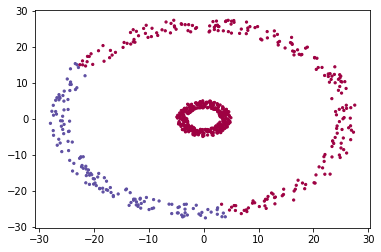

In [33]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap='Spectral')

Vemos que no hay una mejora relevante al aplicar la técnica.

Si aplicamos la técnica del clustering jerárquico, veremos que la claisficación tiende a hacer separaciones correlacionadas con las anteriores.

La solución pasa por buscar **los vectores propios** del data set. Es decir, las direcciones en las que más se encajen los datos. Es una técnica habitual al tratar con datos no estructurados, como por ejemplo, imágenes.

## Algoritmo del Clustering Espectral

Para calcular los vectores propios del data set se aplica una transformación a los datos.

En general el clustering utiliza las métricas de manhattan o euclídea. Este algoritmo lleva a cabo una transformación conocida como **"Kernel Gaussiano"**, que lo que hace es transformar los datos originales mediante la siguiente expresión.

$e^{|D|\cdot\gamma}$

Donde:
* |D| es la matriz de distancias

Lo que da como resultado una matriz laplaciana.

In [34]:
from sklearn.cluster import SpectralClustering

In [35]:
clust = SpectralClustering(2).fit_predict(data)

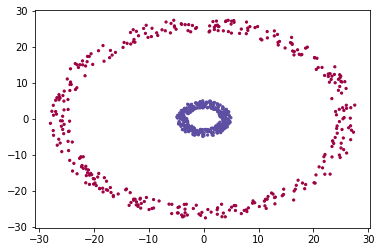

In [36]:
plt.scatter(data[:,0],data[:,1], c = clust, s=5, cmap = 'Spectral')

* Podemos estimar la k:
    * NO: Propagación de la afinidad
    * SI: Podemos usar la distancia Euclídea
        * Sí: K-Means
        * No: Podemos buscar valores centrales:
            * Sí: K-Medoides
            * No: Los datos son linealmente separables:
                * Sí: Clustering aglomerativo 
                * No: Clustering Espectral